<a href="https://colab.research.google.com/github/CBravoR/AdvancedAnalyticsLabs/blob/master/notebooks/python/Lab_3_Bond_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Bond Pricing

In this lab, we will study implementations of the bond pricing structures we have discussed in the lectures. Since we will be using a lot of numerical methods, we would need to program a large set of mathematical functions and other mathematical quantities. Luckily for us, this has already been done.

A **package** is a set of functions, constants, and other data that comes pre-packaged and can be used once installed locally. Many packages are available (exactly [431,218](https://pypi.python.org/pypi) at the time of writing), but we will focus only on a set of them of course.

The fist one is [Numpy](http://www.numpy.org/), self-described as "the fundamental package for scientific computing with Python". It comes with a very large number of scientific functions. These range from simply implementing mathetical constants (such as $\pi$ or $e$), to mathematical functions (such as the logistic functions), random number generators, and much, much, more. As we move along with the activities of the module, we will use many of Numpy's functions, but the packages that we will use will most certainly be using Numpy under the hood.

## Loading packages

To load a package so it can be used in your terminal, write the following line:

```
import PACKAGE as SHORT_NAME
```

For example, to load Numpy and assign it the (well-known) alias "np" we run

In [2]:
import numpy as np

With this, all of numpy is available by calling ```np.NAME```. For example, to check the value of $\pi$.

In [3]:
np.pi

3.141592653589793

... or to calculate the value of $e^4$.

In [4]:
np.round(np.e ** 4, 16) == np.round(np.exp(4), 16)

False

Note that the power function is two asterisks, so for example $4^2$ would require this line of code:

In [5]:
4 ** 2

16

Numpy is a **very** extensive package. You can explore the details of it [here](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html). We will now apply it in order to calculate the functions we need.

## Interest rate conventions.

Let's consider a bond with principal  Y loaned out for 1 year and repaid at the end of the year with no intermediate coupons (0-coupon bond). How much is repaid?

1. Simple interest: Assume an annual rate of $r_s = 2\%$. How much is the bond valued at?

It is a really simple problem, but we can write it more generally by using a **function**. A function is simply an algorithm we predefined for ease of calling. As you studied last week (right????), a function is defined following this convention:

```
def NAME(PARAMS):
    FUNCTION CODE
    MORE CODE
    return OUT
```

Remember that in Python blocks are marked by indented text. Be consistent with your indentations, either use tabs or spaces - not both - in a single cell.

So, let's define the function "bond_pay_simple_interest" which will receive the bond principal and an interest rate, and will return the payment.

In [6]:
def bond_pay_simple_interest(Y, rs = 0.02):
    out = Y * (1 + rs)
    return(out)

Now our function is ready to use! See how we give a value to the interest rate ```rs```? This is an **optional variable**. By saying ```rs = 0.02```, we are allowing the function to receive one or two parameters.

1. Calling ```bond_pay_simple_interest(100000, 0.05)``` will calculate the value of the bond payment using ```Y = 100000, rs = 0.05```.
2. Calling ```bond_pay_simple_interest(100000)``` will calculate the value of the demand using ```rs = 0.02```.
3. Calling ```bond_pay_simple_interest()``` will fail. It requires the input of the first parameter Y (it is not an optional parameter).
4. Calling ```bond_pay_simple_interest(rs = 0.05, Y = 1000000)``` (or any other order) also works as long as all the inputs are named!

In [7]:
bond_pay_simple_interest(100000, 0.05)

105000.0

In [8]:
bond_pay_simple_interest(rs = 0.05, Y = 100000)

105000.0

In [9]:
bond_pay_simple_interest(100000)

102000.0

In [10]:
bond_pay_simple_interest(100000, rs = 0.02)

102000.0

In [11]:
bond_pay_simple_interest()

TypeError: ignored

The last commands fails because the argument Y is **not** an optional argument.


2. Compound interest

Now the bond pays at fixed intervals $m$ during the year. We get an interest rate $r_m$ on each of $m$ periods (each period lasting $1/m$ years for example). Now the formula is:

$$
X_m=Y \cdot (1 + r_m)^m 
$$

Let's write a function for it.

In [12]:
def bond_pay_compound_interest(Y, rm = 0.01, m = 2):
    out = Y * (1 + rm) ** m
    return(out)

Let's compare the payment for one year between the two. We use a rate given by $r_m = r_s  / m$ to show the difference between methods.

In [18]:
print(f'Simple interest payment (one year): {bond_pay_simple_interest(100000)}')
print(f'Compound interest payment (one year, two payments): {bond_pay_compound_interest(100000)}')

Simple interest payment (one year): 102000.0
Compound interest payment (one year, two payments): 102010.0


There is a $10 difference arising from the compound interest.

3. Continous interest: The last way commonly used way to calculate interest is to use continous interest. A continous interest bond pays every fraction of a second. It is usually used for callable bonds or other bonds with an undefined maturity. This method pays continously a certain rate. The formula is now

$$
X_c = Y \cdot exp(r_c * t)
$$

In [19]:
def bond_pay_continous_interest(Y, rc = 0.02, m = 1):
    out = Y * np.exp(rc * m)
    return(out)

Comparing all three now.

In [21]:
print(f'Simple interest payment (one year): {bond_pay_simple_interest(100000)}')
print(f'Compound interest payment (one year, two payments): {bond_pay_compound_interest(100000)}')
print(f'Continous interest (one year): {bond_pay_continous_interest(100000):.2f}')

Simple interest payment (one year): 102000.0
Compound interest payment (one year, two payments): 102010.0
Continous interest (one year): 102020.13


Of course, continous interest gives a much higher payment rate. Which products do you think use continous interest?


## Basic plotting

The above examples are for one-year bonds, but bonds can also have multiple periods. How do the different interest convention look like in this case?

To do this we will first extend our functions to consider multiple payments periods. Assuming $N$ is the number of years the bond is offered, then:

$$
X_s = Y \cdot (1+N \cdot r_s) \\
X_m = Y \cdot (1+r_m)^{N \cdot m} \\
X_c = Y \cdot \exp(r_c \cdot N)
$$

We can extend our original functions to include the **maturity** $N$.

In [22]:
def bond_pay_simple_interest(Y, rs = 0.02, N = 1):
    out = Y * (1 + N * rs)
    return(out)

def bond_pay_compound_interest(Y, rm = 0.01, m = 2, N = 1):
    out = Y * (1 + rm) ** (N * m)
    return(out)

def bond_pay_continous_interest(Y, rc = 0.02, N = 1):
    out = Y * np.exp(N  * rc)
    return(out)

To compare these functions, let's plot them.  We will do so using the extremely powerful package ```matplotlib```, in particular the python implementation ```pyplot```.  We will use the common alias ```plt```.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

The line ```%matplotlib inline``` is called a "magic", and is a command that tells Jupyter to do something specific. This commands tells Jupyter to plot inline (i.e. in this notebook directly), instead of saving the image elsewhere. A list of all magic commands is available [here](http://ipython.readthedocs.io/en/stable/interactive/magics.html).

We can now plot a function with a constant elasticity over the range [1, 100] with the following functions:

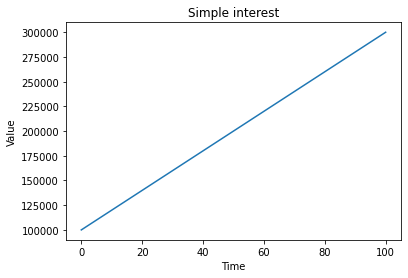

In [25]:
Nseries = np.arange(0, 100.01, 0.05) # Calculates evenly spaced points in the interval 1 to 100.

plt.plot(Nseries, bond_pay_simple_interest(100000, N = Nseries)) # Applies the vector p to the d_const_elast function using elast = 1
plt.title('Simple interest')
plt.xlabel('Period')
plt.ylabel('Value')
plt.show()

We can even compare multiple functions. For example, the following code compares multiple compounding options.

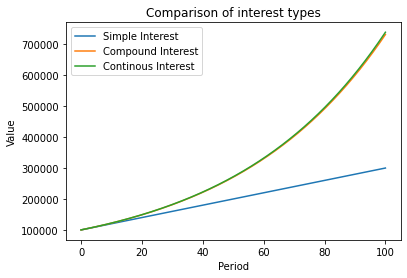

In [26]:
# Each call to plt.plot generates a new part of the plot.
plt.plot(Nseries, bond_pay_simple_interest(100000, N = Nseries))
plt.plot(Nseries, bond_pay_compound_interest(100000, N = Nseries))
plt.plot(Nseries, bond_pay_continous_interest(100000, N = Nseries))

# Add a legend. Note the square brackets.
plt.legend(['Simple Interest', 'Compound Interest', 'Continous Interest'])

# Titles and labels
plt.title('Comparison of interest types')
plt.xlabel('Period')
plt.ylabel('Value')

# What if you want to save the output? This code, called BEFORE the plt.show(), saves
# as an image. You can also save in other formats changing the extension
plt.savefig('RateComparison.jpg', dpi = 300)
plt.savefig('RateComparison.pdf')

# Generates the plot with everything we have added so far since last call to plt.show
plt.show()

## Bond pricing

We can now calculate the value of a bond. Think about it this way: How much are you willing to pay for each bond we saw above?

- The simple interest bond has a much reduced payment value across time.
- The compound and continous one have a much higher payment.
- What about coupons? What happens after each coupon is charged? Does value decrease or increase?

Thus, we need an efficient way to **price** a bond so it reflects how much we expect it to be valued. This will depend on the expected interest rate and returns on the market, so **the value of a bond can vary even though payments are fixed**.

See this [ETF return](https://ca.finance.yahoo.com/quote/VAB.TO/) composed of a mix of different canadian bonds.

How do we price bonds? We need to consider the yearly rate for different instruments (risk-free in this case) and use those. We can get this from the market. Then we can value the bond discounting the payments:

$$
P(0) = \sum_{t=1}^M \frac{c}{(1+r_t)^t} + \frac{1}{(1+r_M)^M}
$$

If you have a non-risk-free-bond, then $r_t = r_{f,t} + s_t$. The final price of the bond is $P \times FV$ with $FV$ the face value of the bond.

If $r$ is constant, then the extension package to numpy, [numpy_financial](https://pypi.org/project/numpy-financial/) offers the function Net Present Value, [```npf.npv```](https://numpy.org/numpy-financial/latest/npv.html), which allows for simple net present value calculations when the rate is fixed and the time periods are equidistant.

Let's calculate the value of a bond under the following conditions:

- Principal \$100,000.
- Yearly coupons, coupon rate $c = 5\%$.
- Market Interest rate $r = 3\%$.

The ```numpy_financial``` package is not part of the standard python installation, so we must install it ourselves. For this, we use Python's package manager ```pip``` (a command line argument). To install a package simply run

```
!pip install PACKAGE_NAME
```

In [27]:
# Install numpy_financial
!pip install numpy_financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# Import numpy_financial
import numpy_financial as npf

# Parameters
X = 100000
C = 0.05 * 100000
r = 0.03

# Payment sequence
payment_series = np.repeat(C, 11)
payment_series[0] -= C # At t = 0 no payment is made. (What do we get if we write -100000?)
payment_series[10]  += X # Last payment with principal

# PV calculation. Note payments are at end of period in this case.
bond_price = npf.npv(r, payment_series)
print(f'The price of the bond is: {bond_price:.2f}')

The price of the bond is: 117060.41


Normally you see the price of the bond expressed in a percentage of the face value.

In [32]:
print(f'Price as a percentage of the face value: {100 * bond_price / X:.2f}%')

Price as a percentage of the face value: 117.06%


In [33]:
payment_series

array([     0.,   5000.,   5000.,   5000.,   5000.,   5000.,   5000.,
         5000.,   5000.,   5000., 105000.])

The interest rate $r$ is also known as the **yield** of the bond. There is an inverse relation between yield and price! Why?


### Pricing with variable rates

So far we have seen payment series when the interest rate is fixed. However, in real life the discount rate we use is related to the bond rate of the Canadian sovereign, or another type of discount factor. For this, we must use a pricing function that takes into account the interest rate series.

Let's consider an annual bond with the following characteristics:

- Principal \$100,000.
- Yearly coupons, coupon rate $c = 5\%$.
- Spread $s = 2\%$.
- Sovereign rate: random value between 1% and 3%.
- Maturity = 10 years

Let's price this bond with a general function.

In [70]:
def bond_price_variable_rate(coupon_rate, discount_rates, time_to_maturity):
  import numpy_financial as npf
  import numpy as np
  # Payment sequence
  payment_series = np.repeat(1, time_to_maturity + 1) # Coupon payments
  payment_series[0] = 0 # no payment at first.
  payment_series = payment_series* coupon_rate # Every payment date you get the coupon
  payment_series[time_to_maturity]  += 1 # Last payment includes the principal.

  # Calculate NPV
  discounted_series = [x / (1 + y) ** i for i, [x, y] in enumerate(zip(payment_series, discount_rates))]  

  # Calculate price
  price = np.sum(discounted_series)
  return price

Now we can calculate our bond price. First, let's calculate the rates under the conditions that we decided.

In [73]:
coupon_rate = 0.05
spread = 0.02
maturity = 10
sovereign_low = 0.01
sovereign_high = 0.03
sovereign_series = np.random.uniform(low=sovereign_low,
                                     high=sovereign_high,
                                     size=maturity + 1)
discount_rates = sovereign_series + spread
discount_rates[0] = 0
discount_rates

array([0.        , 0.04038464, 0.03521744, 0.04871307, 0.04501407,
       0.04563402, 0.04631209, 0.03508047, 0.03385083, 0.04950315,
       0.04807825])

And finally, we can call our function to price the bond.

In [74]:
bond_price_variable_rate(coupon_rate, discount_rates, maturity)

1.0245819873273254

The price obtained (which will change as the sovereign rates are random) is a percentage of the face value. The final price is this value multiplied by the face value. Can you calculate the price after 3 years have passed? How does it change?

### Yield-to-maturity

A useful measure is the yield to maturity of the bond, or the maximum interest rate which we should get in order to have a net present value of 0. This is the same as the Internal Return Rate. Again, if the time between payments is fixed, we can use numpy's [```npf.irr```](https://numpy.org/doc/1.17/reference/generated/numpy.irr.html) function. This function simply receives payments, but we need to add the original investment.

A general way to solve this is to solve the equation behind the YTM. The equation is:

$$
P_{0,paid} - P_{0,CurrentRates} = 0
$$

To solve the equation we will use Scipy's [```fsolve```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) function from the subpackage ```optimize```. This requires we first code the function we want to give to the package to solve (always in the form $f(x) = 0$ and then give a first guess on where the solution is. Let's assume the bond traded at an original price of \$95,000.

In [37]:
from scipy.optimize import fsolve

# Function to solve 
def YTM_equation(Porig, r, c, FV, M):
  # Payment sequence
  payment_series = np.repeat(c * FV, M + 1) # Coupon payments
  payment_series[0] = -1 * Porig # At t = 0 we buy the bond.
  payment_series[M]  += FV # Last payment includes the principal.

  sol = npf.npv(r, payment_series)
  return(sol)

# Solve the equation
ytm_bond = fsolve(lambda x : YTM_equation(r = x, Porig = 95000, FV = 100000, c = 0.05, M = 10), # Lambda function to give other arguments. 
           x0 = 0, # Initial guess
           xtol=1.49012e-08 # Tolerance. If failing to converge play around with this
           )

# Print the value. the '.item()' is needed as the fsolve function delivers an array
print(f'The yield to maturity is equal to {100 * ytm_bond.item():.2f}%')


The yield to maturity is equal to 5.67%


Our YTM is higher than the coupon rate of the bond (5.67% vs 5%). Why? Play around with these quantities to observe the relationship between prices and yields.

### Clean and dirty bond prices

The final step in this bond price section is to get the **clean price** of the bond. A coupon-based bond will have different price as coupons are repaid, so large drops in value are expected after each payment.

Let's plot the different bond values as time advances, for a 10-year bond with principal 100000 and yearly coupons with rate 5%, in a market with rate 3%. We need to calculate the bond price as we receive payments, and we will interpolate the value between different payment periods using a monthly base.

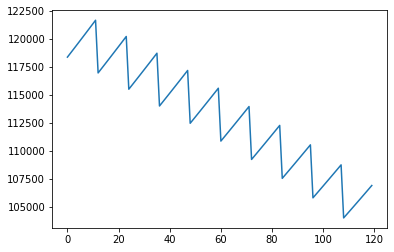

In [38]:
# Payment sequence
payment_series = np.repeat(0.0, 12*11) # First year no payments.
payment_series[0] = 0 # At t = 0 we buy the bond.
payment_series[131]  += 100000 # Last payment with principal.

# Change only every 12th value, starting from the 12th.
payment_series[11::12] += 100000*0.05

# Calculate the value series. We to apply the npv function moving each starting point one month.
# We will use a list comprehension.
value_series = [npf.npv(0.03/12, payment_series[i:]) for i in range(0, 120)]

# Finally we plot the bond value
plt.plot(value_series)
plt.show()

Note the ```(start):(end):(step)``` notation for indexing, and the use of [list comprehensions](https://www.programiz.com/python-programming/list-comprehension), a very powerful Python notation system.

What's happening here? Why does the price move up and down like this?

This series is the **dirty price** of the bond, and is the price you would pay if you were to buy it in the market.

We would like to discount this value so we get a flat price. This is the **clean price** of the bond. The movements occur due to the next coupon, so we will eliminate the proportion of the coupon already earned. Considering coupons with $M$ months already gone by, then:

$$
P_{clean}  = P_{dirty} - \frac{C * M}{12}
$$

Let's calculate the clean series and then recalculate the bond price. We can again use a list comprehension in a more complex format.


In [ ]:
C = 100000*0.05
clean_price = result = [w - (C * (i % 12)) / 12 for i, w in enumerate(value_series)]

plt.plot(clean_price)
plt.plot(value_series)
plt.legend(['Clean price', 'Dirty price'])
plt.show()

Several new concepts here:

- The [```enumerate```](https://docs.python.org/3/library/functions.html#enumerate) function turns a series into an *iterable* (an object we can iterate through) with the format (index, value). So each element of the series is split into an index (the position) and the value of the element. We then assign this to i and w when we write ```i,w in enumerate(value_series)```.

- We add a [modulo](https://python-reference.readthedocs.io/en/latest/docs/operators/modulus.html) function, which gives us the reminder of the division between i and 12. It is represented by a percentage in Python.

And this gives us the clean price, which represents a simplified way to assign the value of the coupon between buyer and seller. We do this for simplicity.

# Homework

1. Implement your own net present value function which allows for different time periods between payments, and different interest rates per year. With this:

- Price a bond with semiannual payments.
- Price a bond with monthly payments (exactly).
- Price a bond with monthly payments which was bought two weeks ago.

Compare against the results of the example bond above.

2. Modify the Clean-and-Dirty price equation to include the real time between payments for a monthly coupons with rate $c = 0.42\%$. Compare with the bond above.

3. Solve question 1 of the coursework. You have all you need now!